In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
len(df)

768

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Check the exact column names in your DataFrame
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


<Axes: >

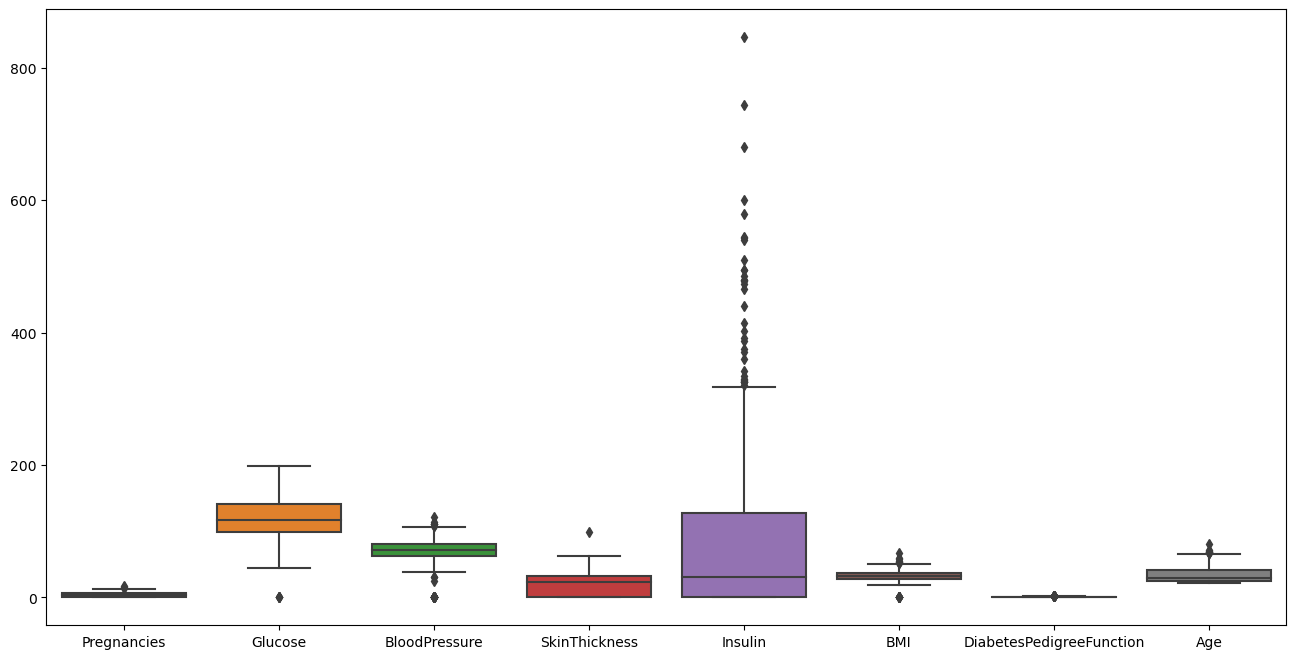

In [12]:
numerical_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(df[numerical_cols])

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

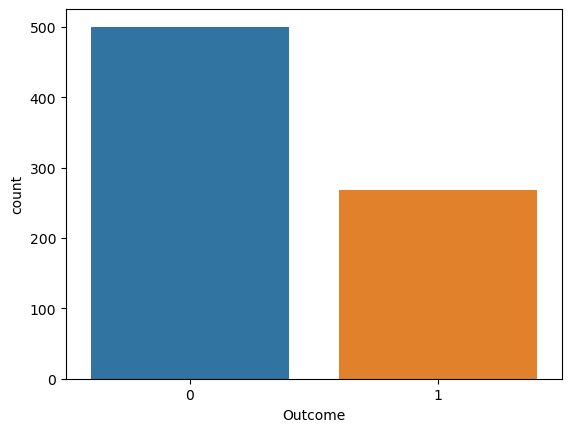

In [14]:
sns.countplot(x=df['Outcome'])

<Axes: xlabel='Pregnancies', ylabel='count'>

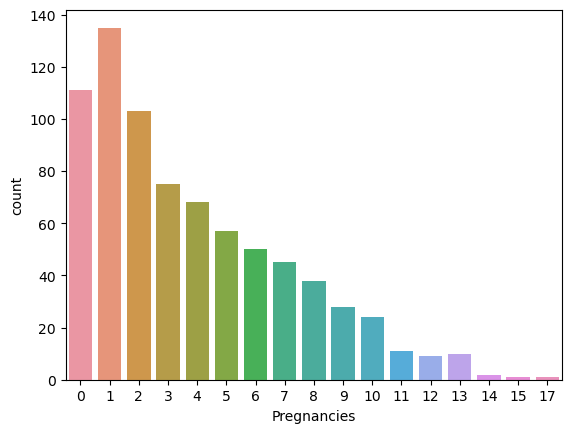

In [15]:
sns.countplot(x=df['Pregnancies'])

In [16]:
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [17]:
# Create and fit the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_features])

MinMaxScaler()

In [18]:
# Normalize the numerical features
normalized_data = scaler.transform(df[numerical_features])

# Update the original DataFrame with normalized values
df[numerical_features] = normalized_data

# outlier detection and removal

<Axes: xlabel='Glucose'>

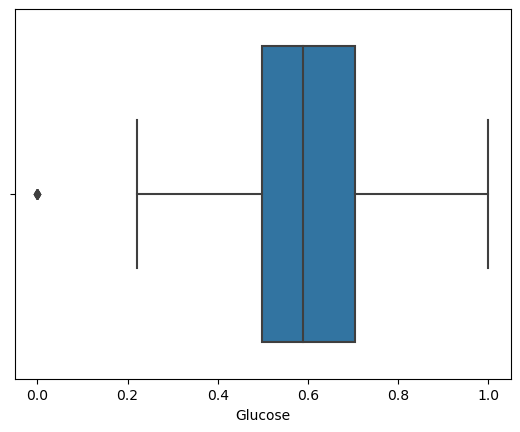

In [19]:
sns.boxplot(x=df['Glucose'])

In [20]:
df.drop(df[df['Glucose'] < 0.2].index, inplace=True)

<Axes: xlabel='BloodPressure'>

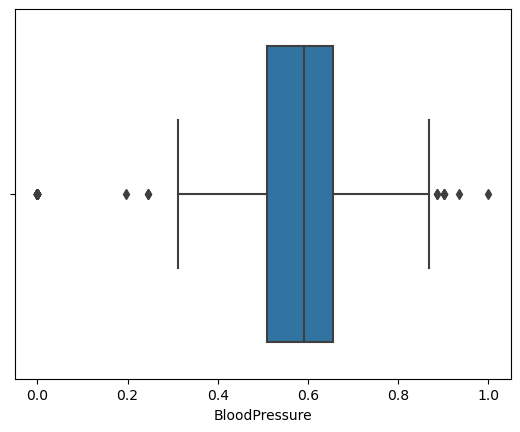

In [21]:
sns.boxplot(x=df['BloodPressure'])

In [22]:
df.drop(df[df['BloodPressure'] < 0.3].index, inplace=True)

<Axes: xlabel='SkinThickness'>

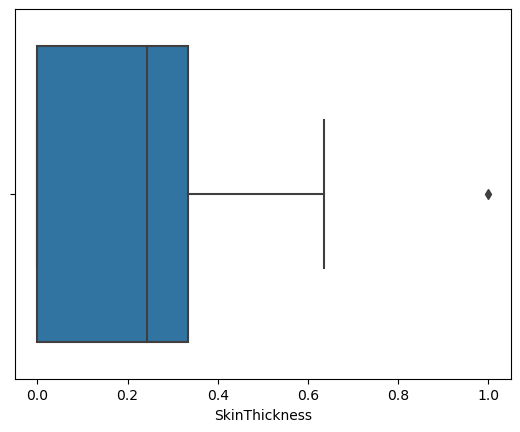

In [23]:
sns.boxplot(x=df['SkinThickness'])

In [24]:
df.drop(df[df['SkinThickness'] > 0.8].index, inplace=True)

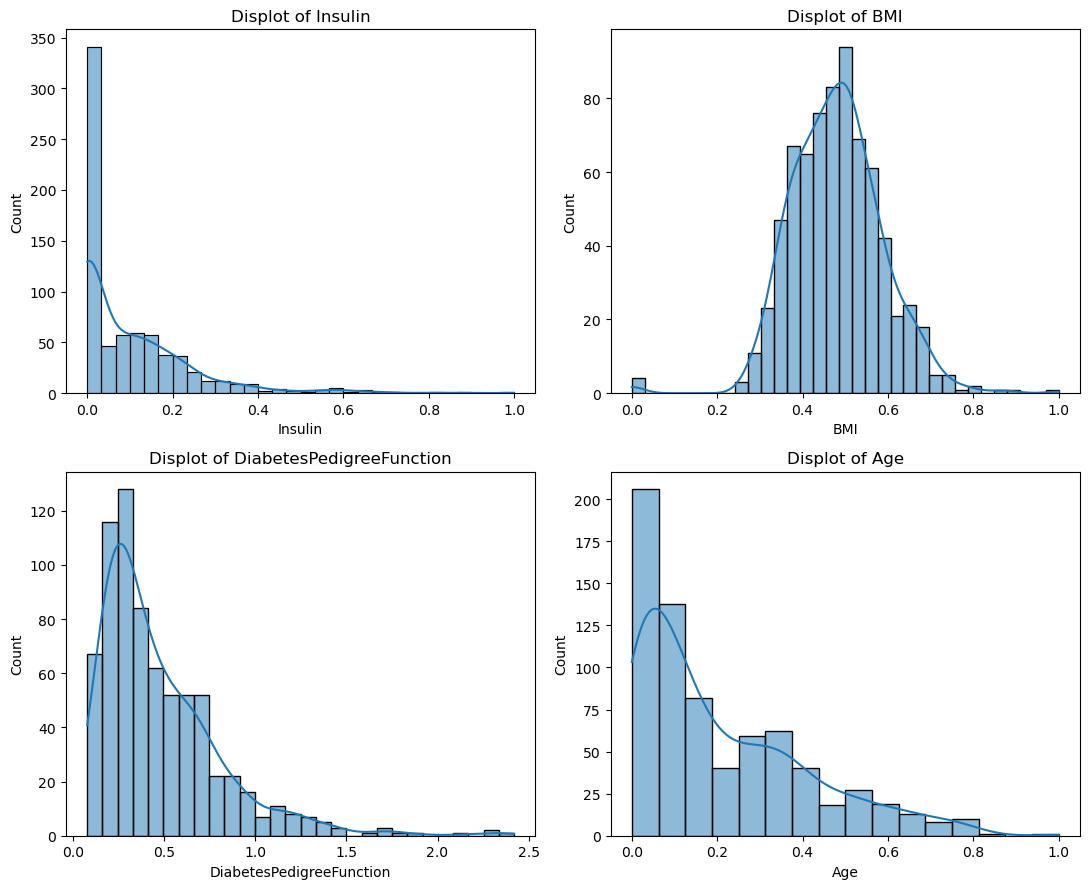

In [25]:
displot_cols = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize = (11,9))

for i in range(len(displot_cols)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x = df[displot_cols[i]],kde=True)
    plt.title('Displot of {}'.format(displot_cols[i]))
    plt.tight_layout()

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1


In [27]:
df_majority_0 = df[(df['Outcome']==0)] 
df_minority_1 = df[(df['Outcome']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples=len(df_majority_0), 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<Axes: xlabel='Outcome', ylabel='count'>

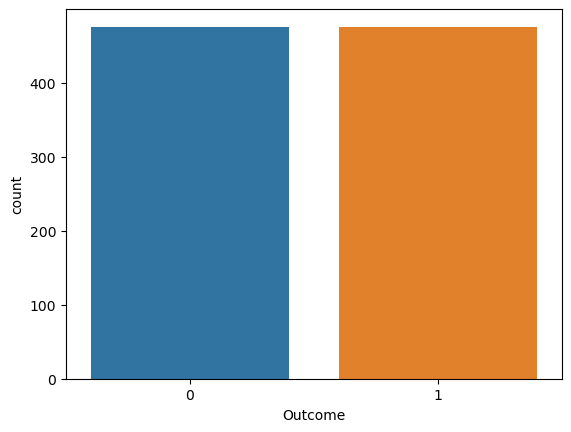

In [28]:
sns.countplot(x=df_upsampled['Outcome'])

In [29]:
df_upsampled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
# separating the data and labels
X = df_upsampled.drop(columns = 'Outcome', axis=1)
Y = df_upsampled['Outcome']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(952, 8) (761, 8) (191, 8)


In [33]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=75,max_depth=5) 
RandomForestClassifierModel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=75)

In [34]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, Y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, Y_test))

RandomForestClassifierModel Train Score is :  0.8830486202365309
RandomForestClassifierModel Test Score is :  0.8638743455497382


In [35]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

In [36]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()
# Use RandomizedSearchCV for hyperparameter tuning
random_search = RSCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=15, cv=5)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_samples': [0.3, 0.5, 0.8],
                                        'n_estimators': array([ 50,  65,  80,  95, 110, 125, 140, 155, 170, 185])})

In [37]:
# Get the best estimator
best_rf_classifier = random_search.best_estimator_

In [38]:
# Evaluate the accuracy on the test set
accuracy = best_rf_classifier.score(X_test, Y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9057591623036649


In [39]:
accuracy = best_rf_classifier.score(X_train, Y_train)
print("Train set accuracy:", accuracy)

Train set accuracy: 0.985545335085414


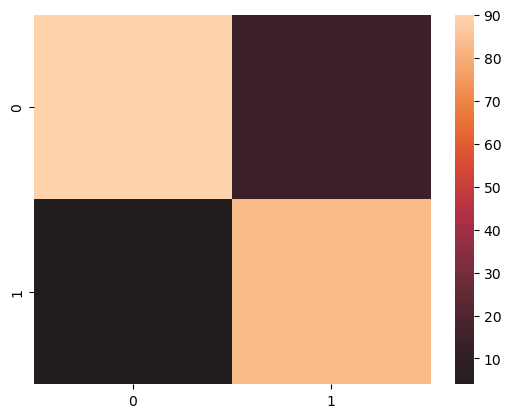

Confusion Matrix is
 [[90 14]
 [ 4 83]]


In [40]:
y_pred_RF = best_rf_classifier.predict(X_test)
CM_RF = confusion_matrix(Y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [43]:
print(classification_report(Y_test, y_pred_RF))
print(accuracy_score(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       104
           1       0.86      0.95      0.90        87

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191

0.9057591623036649
